In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
k = 10.0
m = 1.0
b = 0.5
v_0 = 2.0
x_0 = 0.0

In [ ]:
def move(t, y):
  x, v = y
  dxdt = v
  dvdt = -(b/m) * v - (k/m) * x
  return [dxdt, dvdt]

In [ ]:
T = 5
t_span = (0, T)
init_cond = [x_0, v_0]

In [ ]:
ans = solve_ivp(move, t_span, init_cond, t_eval=np.linspace(0, T, 500))

In [ ]:
x = ans.y[0]
v = ans.y[1]
t = ans.t

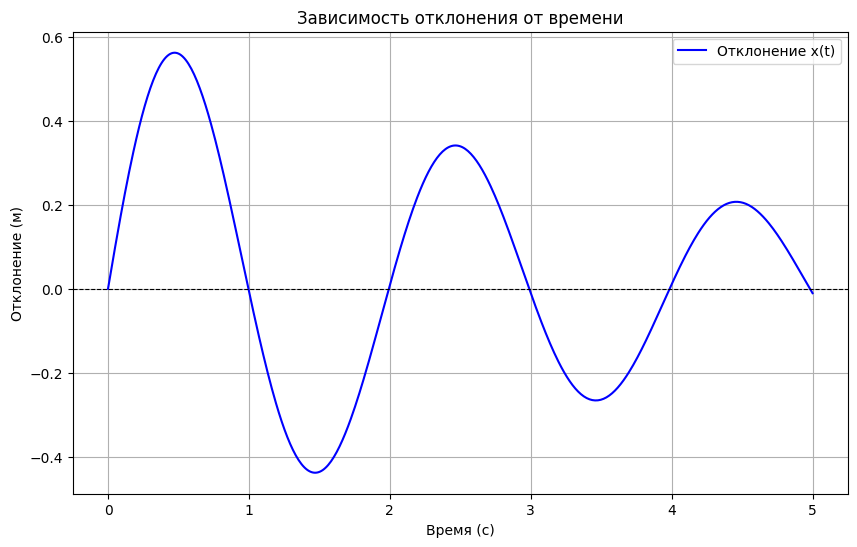

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Отклонение x(t)', color='blue')
plt.title('Зависимость отклонения от времени')
plt.xlabel('Время (с)')
plt.ylabel('Отклонение (м)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def move_RK4(t, y):
    x, v = y
    dxdt = v
    dvdt = -(b/m) * v - (k/m) * x
    return np.array([dxdt, dvdt])

In [ ]:
def Runge_Kutta_4(func, y_0, t):
  n = len(t)
  y = np.zeros((n, len(y_0)))
  y[0] = y_0
  for i in range(1, n):
    dt = t[i] - t[i - 1]
    k1 = func(t[i - 1], y[i - 1])
    k2 = func(t[i - 1] + dt / 2, y[i - 1] + dt * k1 / 2)
    k3 = func(t[i - 1] + dt / 2, y[i - 1] + dt * k2 / 2)
    k4 = func(t[i - 1] + dt, y[i - 1] + dt * k3)
    y[i] = y[i - 1] + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6

  return y

In [ ]:
T = 5
n_points = 500

In [ ]:
t = np.linspace(0, T, n_points)
initial_conditions = [x_0, v_0]

In [ ]:
solution = Runge_Kutta_4(move_RK4, initial_conditions, t)
x = solution[:, 0]
v = solution[:, 1]

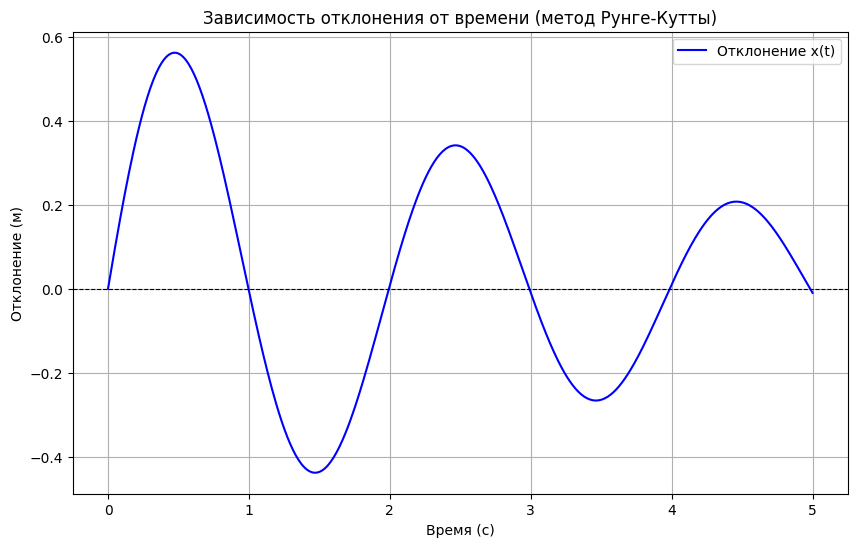

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Отклонение x(t)', color='blue')
plt.title('Зависимость отклонения от времени (метод Рунге-Кутты)')
plt.xlabel('Время (с)')
plt.ylabel('Отклонение (м)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [ ]:
kinetic_energy = 0.5 * m * v**2
potential_energy = 0.5 * k * x**2
total_energy = kinetic_energy + potential_energy

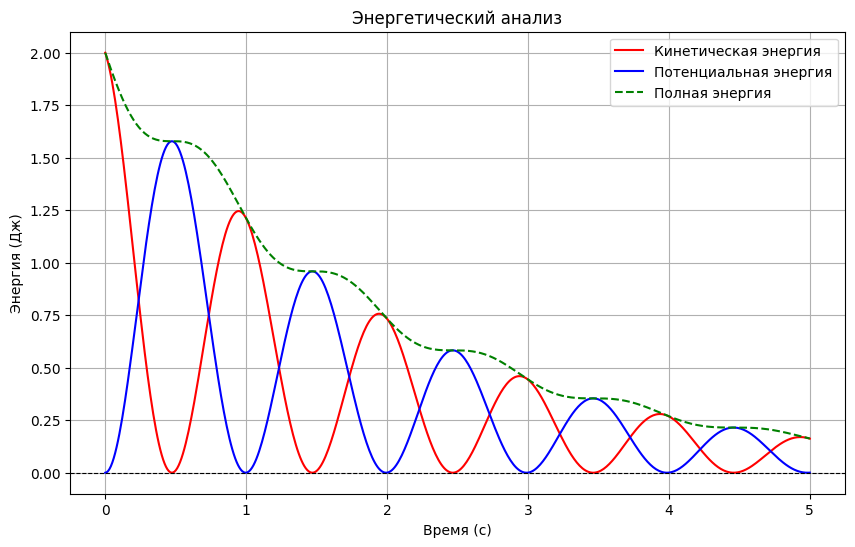

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, kinetic_energy, label='Кинетическая энергия', color='red')
plt.plot(t, potential_energy, label='Потенциальная энергия', color='blue')
plt.plot(t, total_energy, label='Полная энергия', color='green', linestyle='--')
plt.title('Энергетический анализ')
plt.xlabel('Время (с)')
plt.ylabel('Энергия (Дж)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid()
plt.show()